In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [16]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [17]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

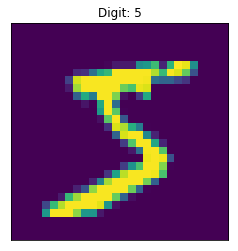

In [18]:
plt.imshow(X_train[0])
plt.title("Digit: {}".format(Y_train[0]))
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
print("x_training shape: ", X_train.shape)
print("y_training shape: ", Y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", Y_test.shape)

X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train /= 255
X_test /= 255
 
print("training shape", X_train.shape)
print("test shape", X_test.shape)

n_classes=10
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

x_training shape:  (60000, 28, 28)
y_training shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)
training shape (60000, 28, 28, 1)
test shape (10000, 28, 28, 1)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [24]:
model = Sequential()

In [31]:
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', 
                 input_shape=(28,28,1)))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
          
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [33]:
model.fit(X_train, Y_train, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 154s 3ms/step - loss: 0.2073 - acc: 0.9371
Epoch 2/5
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0729 - acc: 0.9771
Epoch 3/5
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0554 - acc: 0.9822
Epoch 4/5
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0466 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0403 - acc: 0.9870


In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("test loss: ", test_loss)
print("test accuracy: ", test_acc)

10000/10000 [==============================] - 7s 731us/step
test loss:  0.027556035634805447
test accuracy:  0.9915


In [35]:
predictions= model.predict_classes(X_test)
prediction = model.predict(X_test)

def plot_image(i, predictions_array, prediction_array, true_y, x):
    predictions_array, prediction_array, true_y = predictions_array[i], prediction_array[i], true_y[i]
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(x[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.xlabel("Predicted: {} {:2.0f}% (Truth: {})".format(predictions_array,
                                100*np.max(prediction_array), true_y))
    

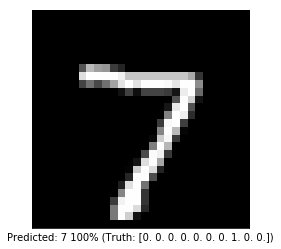

In [36]:
i=0
plot_image(i, predictions, prediction, Y_test, X_test)
plt.show()